# Titanic Dataset from Kagle

# Load Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import seaborn as sns

## Load dataset from Github 

In [3]:
def load_titanic_data():
    tarball_path = Path("datasets/titanic.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/titanic.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as titanic_tarball:
            titanic_tarball.extractall(path="datasets")
    return [pd.read_csv(Path("datasets/titanic") / filename)
            for filename in ("train.csv", "test.csv")]

train_data, test_data = load_titanic_data()

# Exploratory Data Analysis

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Get count of Male and Females on board

In [6]:
train_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [7]:
train_data['Survived'].value_counts()  # Count the number of survivors and non-survivors

Survived
0    549
1    342
Name: count, dtype: int64

In [8]:
train_data.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

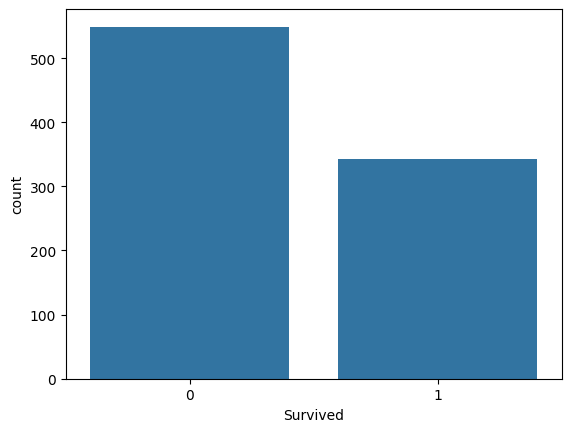

In [9]:
sns.countplot(x='Survived', data=train_data)

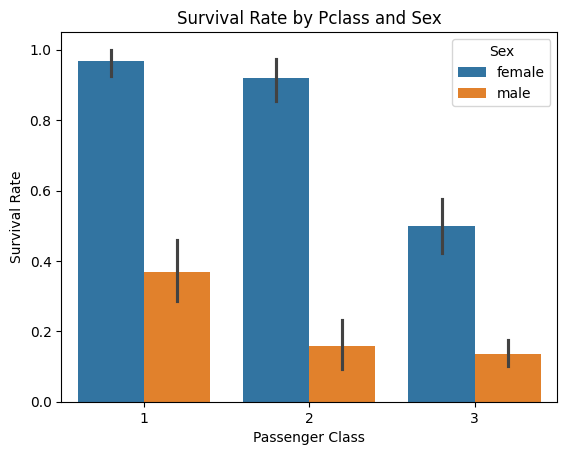

In [10]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_data)
plt.title('Survival Rate by Pclass and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

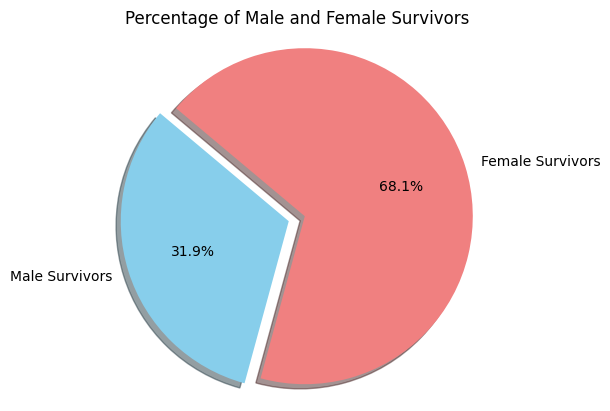

In [11]:
# Calculate the percentage of male and female survivors
survivor_counts = train_data[train_data['Survived'] == 1]['Sex'].value_counts()
total_survivors = survivor_counts.sum()
male_survivor_percentage = (survivor_counts['male'] / total_survivors) * 100
female_survivor_percentage = (survivor_counts['female'] / total_survivors) * 100

# Create the pie chart
labels = ['Male Survivors', 'Female Survivors']
sizes = [male_survivor_percentage, female_survivor_percentage]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Male and Female Survivors')
plt.show()

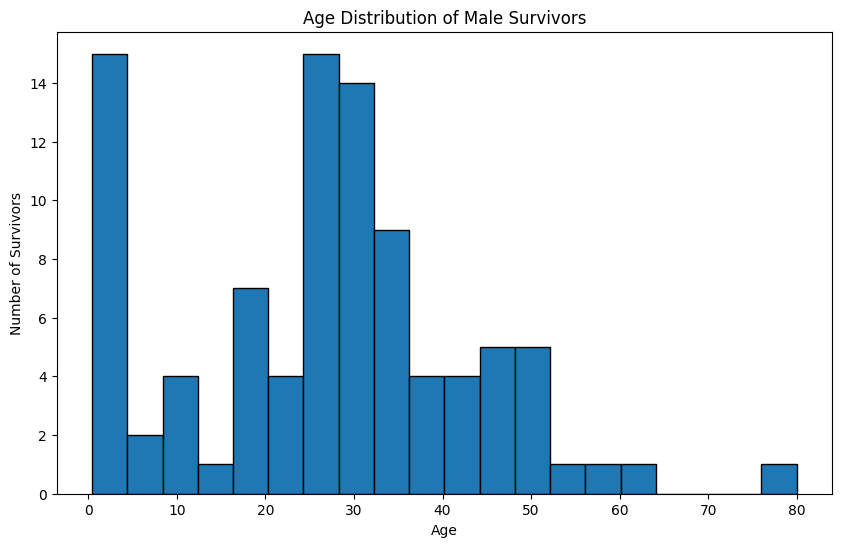

In [12]:
male_survivors = train_data[(train_data['Survived'] == 1) & (train_data['Sex'] == 'male')]

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(male_survivors['Age'].dropna(), bins=20, edgecolor='black')  # Use dropna() to handle missing values
plt.title('Age Distribution of Male Survivors')
plt.xlabel('Age')
plt.ylabel('Number of Survivors')
plt.show()

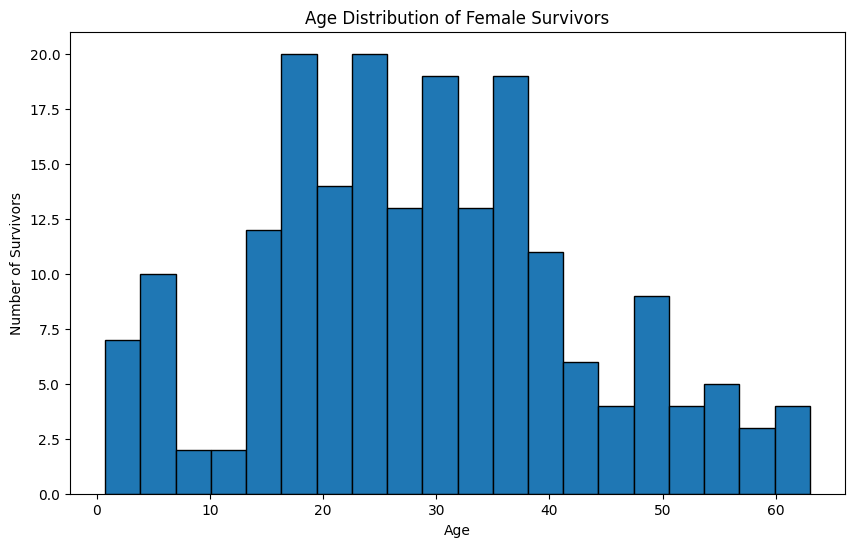

In [13]:
female_survivors = train_data[(train_data['Survived'] == 1) & (train_data['Sex'] == 'female')]

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(female_survivors['Age'].dropna(), bins=20, edgecolor='black')  # Use dropna() to handle missing values
plt.title('Age Distribution of Female Survivors')
plt.xlabel('Age')
plt.ylabel('Number of Survivors')
plt.show()

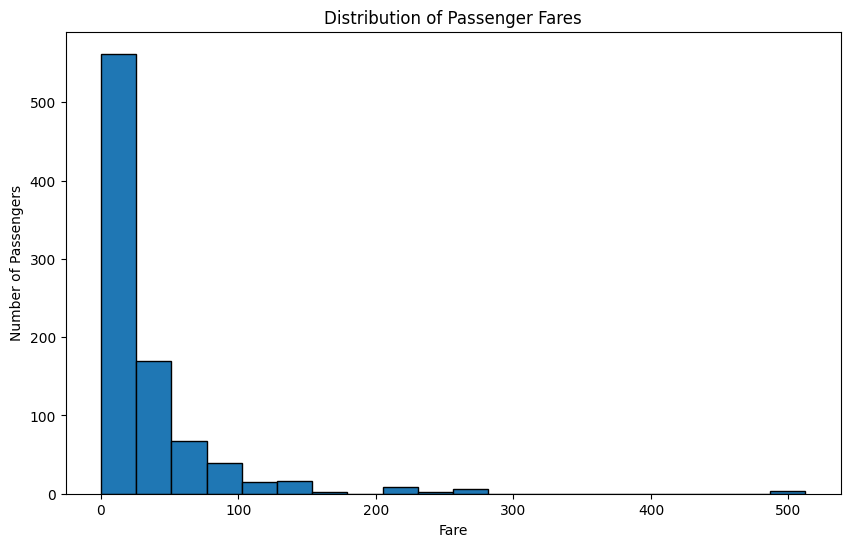

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(train_data['Fare'].dropna(), bins=20, edgecolor='black')
plt.title('Distribution of Passenger Fares')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.show()

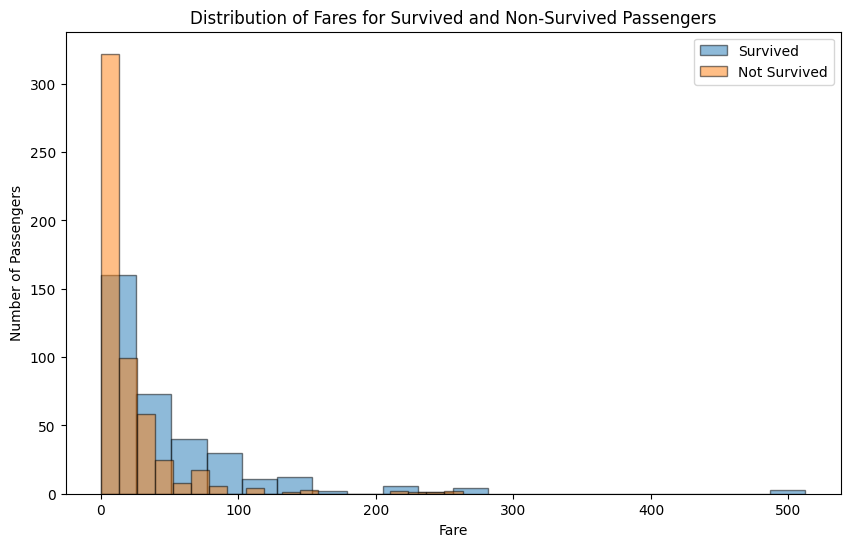

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(train_data[train_data['Survived'] == 1]['Fare'], bins=20, alpha=0.5, label='Survived', edgecolor='black')
plt.hist(train_data[train_data['Survived'] == 0]['Fare'], bins=20, alpha=0.5, label='Not Survived', edgecolor='black')

plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Fares for Survived and Non-Survived Passengers')
plt.legend()
plt.show()

In [16]:
# Group data by cabin and sex, then calculate the average fare
average_fare_by_cabin_sex = train_data.groupby(['Pclass', 'Sex'])['Fare'].mean().unstack()

# Display the table
print(average_fare_by_cabin_sex)

Sex         female       male
Pclass                       
1       106.125798  67.226127
2        21.970121  19.741782
3        16.118810  12.661633


In [17]:
# Group data by cabin and sex, then calculate the average fare
parch_and_sex = train_data.groupby(['Parch', 'Sex'])['Fare'].mean().unstack()

# Display the table
print(parch_and_sex)

Sex       female        male
Parch                       
0      39.826591   19.879078
1      46.987292   46.561857
2      63.231292   66.086290
3      23.845825   34.375000
4      24.487500  145.450000
5      32.868750   31.275000
6      46.900000         NaN


In [18]:
nan_attributes = train_data.columns[train_data.isna().any()].tolist()
nan_attributes

['Age', 'Cabin', 'Embarked']

In [19]:
# Fill in missing values for age
# Calculate the median age
median_age = train_data['Age'].median()

# Fill NaN values with the median age
train_data['Age'].fillna(median_age, inplace=True)

/tmp/ipykernel_82914/2272171996.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(median_age, inplace=True)


In [20]:
median_ages_by_embarked = train_data.groupby('Embarked')['Age'].median()

In [21]:
# fill in missing cabin values
train_data['Cabin'].fillna('Unknown', inplace=True)

train_data['Embarked'].fillna('Unknown', inplace=True)

/tmp/ipykernel_82914/1431931587.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Cabin'].fillna('Unknown', inplace=True)
/tmp/ipykernel_82914/1431931587.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [22]:
nan_attributes = train_data.columns[train_data.isna().any()].tolist()
nan_attributes

[]

# Encode categorical data

In [23]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [24]:
# this will convert sex and embarked into numerical data -- Name will be dropped from the dataset, name has no affect on the outcome
cols = ['Sex', 'Ticket', 'Cabin', 'Embarked']
label_encoder = LabelEncoder()

for col in cols:
    # Ensure the column is a 1D array before applying LabelEncoder
    train_data[col] = label_encoder.fit_transform(train_data[col].astype(str))